In [7]:
# Facial Keypoints Detection

In [ ]:
![image.png](attachment:image.png)

-  The marking of important areas of the face, such as the eyes, corners of the mouth, and nose, that are relevant for a variety of tasks, such as face filters, emotion recognition, and pose recognition, using convolutional neural network and computer vision techniques to perform facial Keypoint detection.

-  It entails forecasting the Facial Key points coordinates for a particular face, such as nose tip, the center of eyes, and so on. To recognize facial key points, we use a Convolutional Neural Network-based model.

-  Convolutional Neural Networks (CNN) has a deep structure that allows them to extract high-level information and provide better precision when identifying each important point. Convolutional networks are designed to anticipate all points at the same time.

In [8]:
### Import Required Libraries 
import os
import cv2
import time
import math
import keras
import tensorflow
from PIL import Image
import pandas as pd 
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Activation
from keras.layers import Flatten, Dense
from keras.layers import normalization
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History

In [9]:
### Importing train & test dataset
train = pd.read_csv('training.csv', header=0)
test = pd.read_csv('test.csv', header=0)
X_test, y_test = test[:-1], test["Image"]
len(train)
train.T.head()

0          1          2          3     \
left_eye_center_x        66.033564  64.332936  65.057053  65.225739   
left_eye_center_y        39.002274  34.970077  34.909642  37.261774   
right_eye_center_x       30.227008  29.949277  30.903789  32.023096   
right_eye_center_y       36.421678  33.448715  34.909642  37.261774   
left_eye_inner_corner_x  59.582075   58.85617     59.412  60.003339   

                              4          5          6          7         8     \
left_eye_center_x        66.725301  69.680748  64.131866  67.468893  65.80288   
left_eye_center_y        39.621261  39.968748   34.29004  39.413452   34.7552   
right_eye_center_x        32.24481  29.183551  29.578953  29.355961  27.47584   
right_eye_center_y       38.042032  37.563364   33.13804  39.621717   36.1856   
left_eye_inner_corner_x   58.56589  62.864299  57.797154  59.554951  58.65216   

                              9     ...       7039       7040       7041  \
left_eye_center_x        64.121231  ...  69.229935  63.352951  65.711151   
left_eye_center_y        36.740308  ...  38.575634  35.671311  38.843545   
right_eye_center_x       29.468923  ...  29.407912  33.952078  32.268751   
right_eye_center_y       38.390154  ...   38.34545  40.816448  37.706043   
left_eye_inner_corner_x  58.620923  ...        NaN        NaN        NaN   

                              7042       7043       7044       7045  \
left_eye_center_x        67.929319  66.867222  67.402546    66.1344   
left_eye_center_y        35.846552  37.356855  31.842551  38.365501   
right_eye_center_x        28.68782  30.750926  29.746749  30.478626   
right_eye_center_y       41.452484  40.115743  38.632942  39.950198   
left_eye_inner_corner_x        NaN        NaN        NaN        NaN   

                              7046       7047       7048  
left_eye_center_x        66.690732  70.965082  66.938311  
left_eye_center_y        36.845221  39.853666   43.42451  
right_eye_center_x        31.66642  30.543285  31.096059  
right_eye_center_y       39.685042  40.772339  39.528604  
left_eye_inner_corner_x        NaN        NaN        NaN  

[5 rows x 7049 columns]

In [10]:
## Check for null values
print(f'Feature \t\t\t Missing \t Percentage missing\n')
for k,v in train.isna().sum().items():
    print(f'{k !s:30} :{v :8} \t {round(v/len(train),2)}%')
    

Feature 			 Missing 	 Percentage missing

left_eye_center_x              :      10 	 0.0%
left_eye_center_y              :      10 	 0.0%
right_eye_center_x             :      13 	 0.0%
right_eye_center_y             :      13 	 0.0%
left_eye_inner_corner_x        :    4778 	 0.68%
left_eye_inner_corner_y        :    4778 	 0.68%
left_eye_outer_corner_x        :    4782 	 0.68%
left_eye_outer_corner_y        :    4782 	 0.68%
right_eye_inner_corner_x       :    4781 	 0.68%
right_eye_inner_corner_y       :    4781 	 0.68%
right_eye_outer_corner_x       :    4781 	 0.68%
right_eye_outer_corner_y       :    4781 	 0.68%
left_eyebrow_inner_end_x       :    4779 	 0.68%
left_eyebrow_inner_end_y       :    4779 	 0.68%
left_eyebrow_outer_end_x       :    4824 	 0.68%
left_eyebrow_outer_end_y       :    4824 	 0.68%
right_eyebrow_inner_end_x      :    4779 	 0.68%
right_eyebrow_inner_end_y      :    4779 	 0.68%
right_eyebrow_outer_end_x      :    4813 	 0.68%
right_eyebrow_outer_end_y      

<AxesSubplot:>

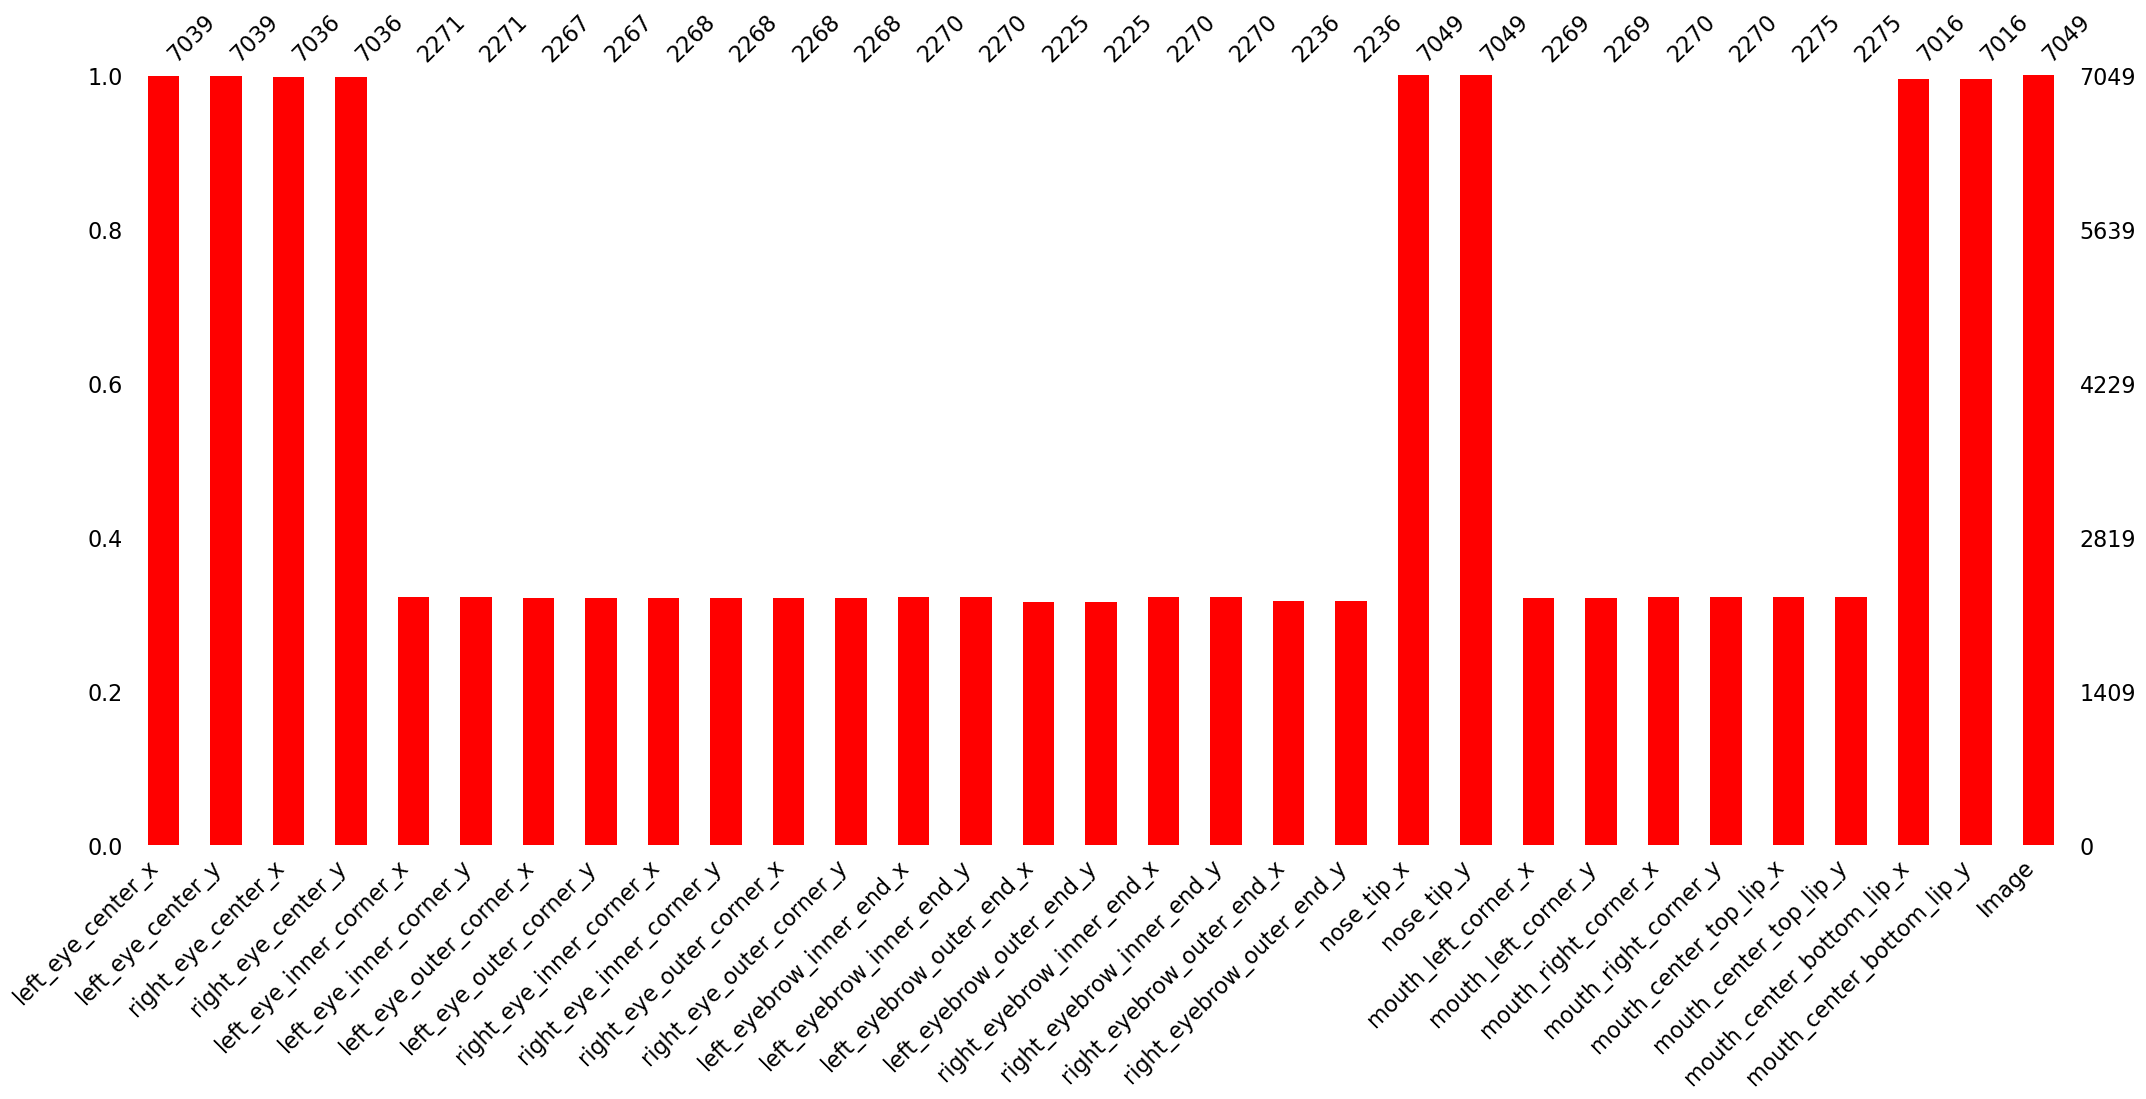

In [11]:
## Train data
import missingno as msno
msno.bar(train,color=(1, 0, 0))

<AxesSubplot:>

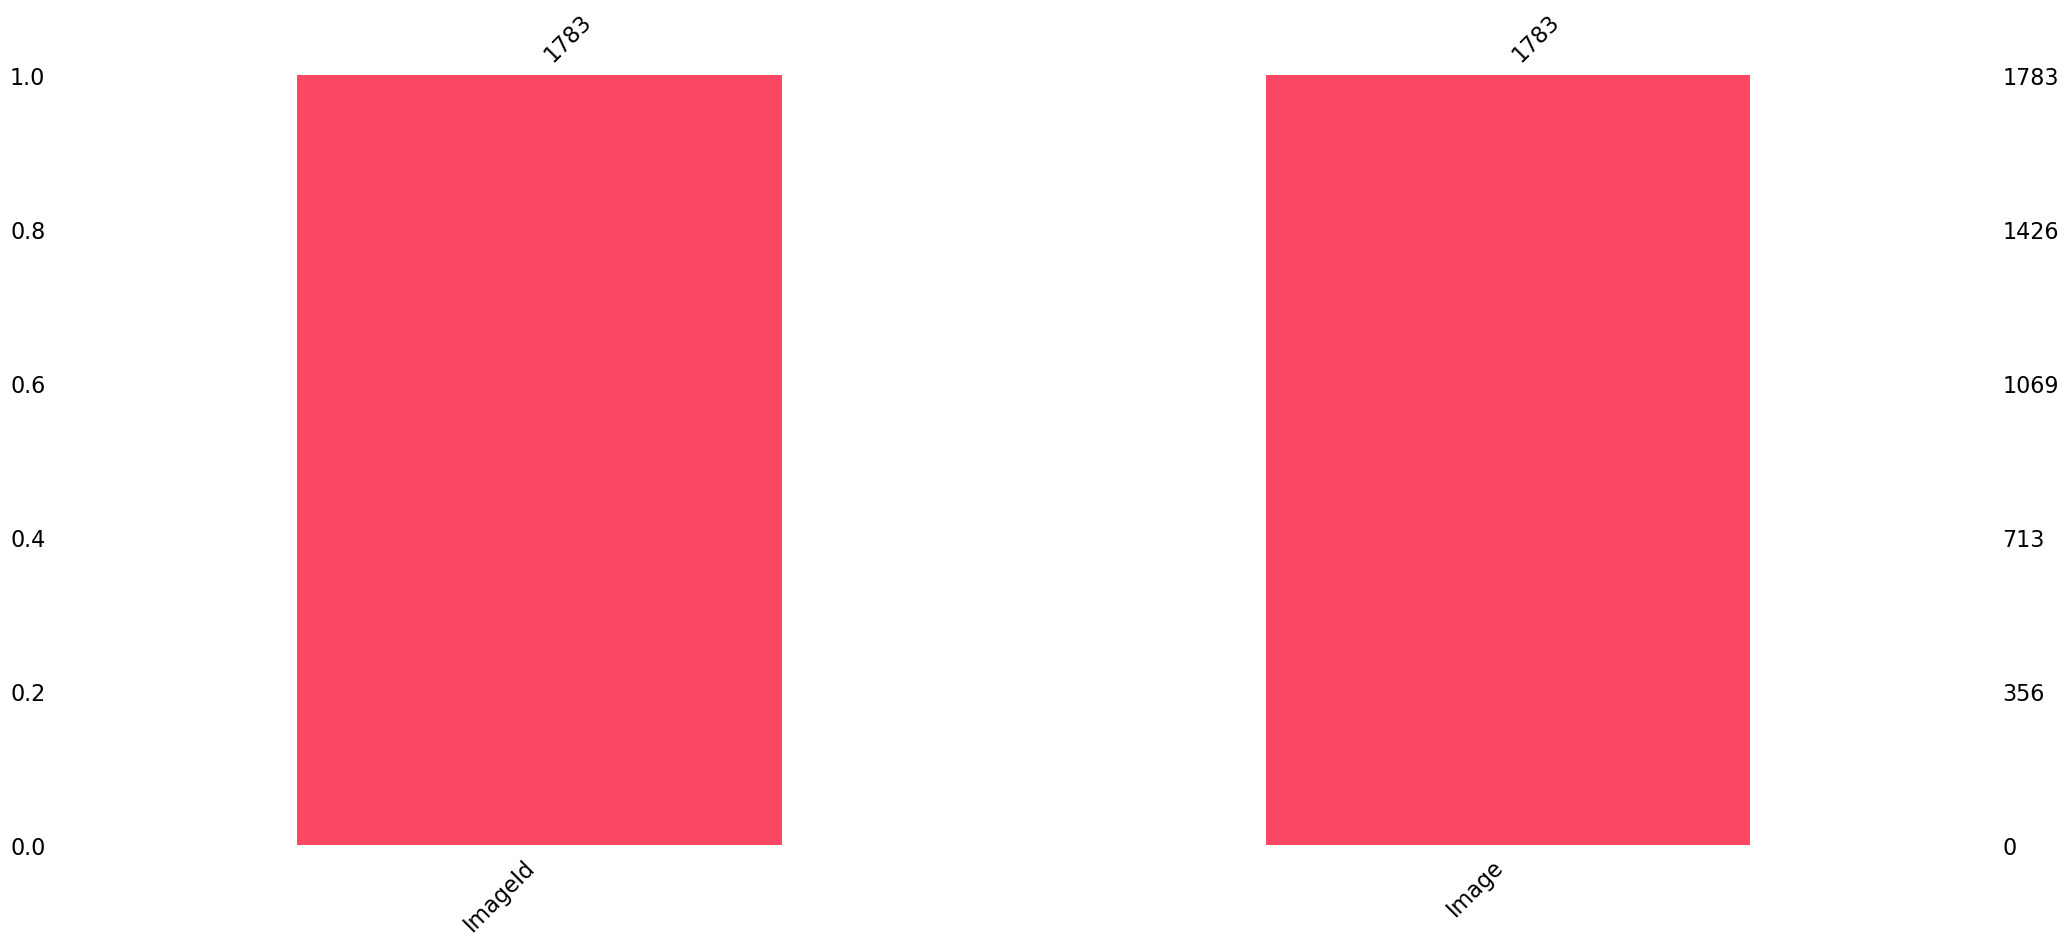

In [12]:
##  Test data
import missingno as msno
msno.bar(test,color=(0.98, 0.28, 0.39))

In [13]:
# to remove rows with missing values
train.dropna(inplace = True)

In [14]:
# sum of all missing values
train.isnull().sum().sum()

0

In [15]:
# to display summary of dataset structure and content
train.info()
train['Image'].head()
len(train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

2140

In [16]:
# to set a new index for the "train" dataframe
keys = np.arange(0, 2140)
train = train.set_index(keys)
train.T.head(5)
type(train)

pandas.core.frame.DataFrame

In [21]:
# list of lists(contains pixel values for images)
imag = []  
for i in range(len(train)):
    if i==210 or i==350 or i==499 or i==512 or i==810 or i==839 or i==895 or i==1058 or i==1194:
        continue
    img = train['Image'][i].split(' ')
    img = [pixel if pixel != '' else '0' for pixel in img]
   
    imag.append(img)
image_list = np.array(imag, dtype = 'float')

In [22]:
X_train = image_list.reshape(-1, 96, 96, 1)
targets = np.array(train.iloc[:, :-1])
print('Shape of images',X_train.shape)
print('Shape of targets',targets.shape)

Shape of images (2131, 96, 96, 1)
Shape of targets (2140, 30)


## Data Visualization

In [23]:
#  Visualize
viz = np.array([train['Image'][i].split(' ') for i in range(len(train))],dtype='float')
keys = train.drop(['Image'], axis=1)

C:\Users\PRITI CHAUDHARY\AppData\Local\Temp\ipykernel_17560\894729145.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


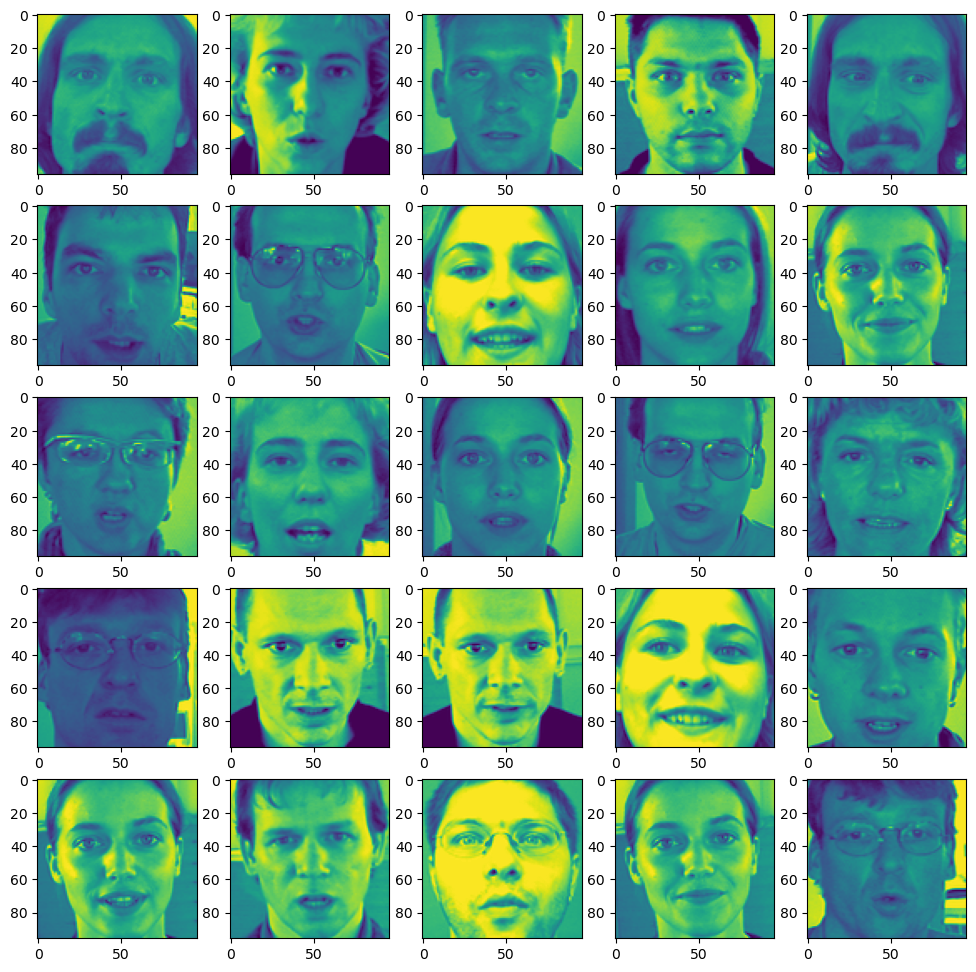

In [24]:
# Gallery using Matplotlib 
fig, ax = plt.subplots(5, 5, figsize = (12,12), dpi = 100)
axes = ax.ravel()

for idx,ax  in enumerate(axes):
    ax.imshow(viz[idx].reshape(96, 96, 1))
    photo_visualize_pnts = keys.iloc[idx].values
fig.show()

C:\Users\PRITI CHAUDHARY\AppData\Local\Temp\ipykernel_17560\1352036133.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


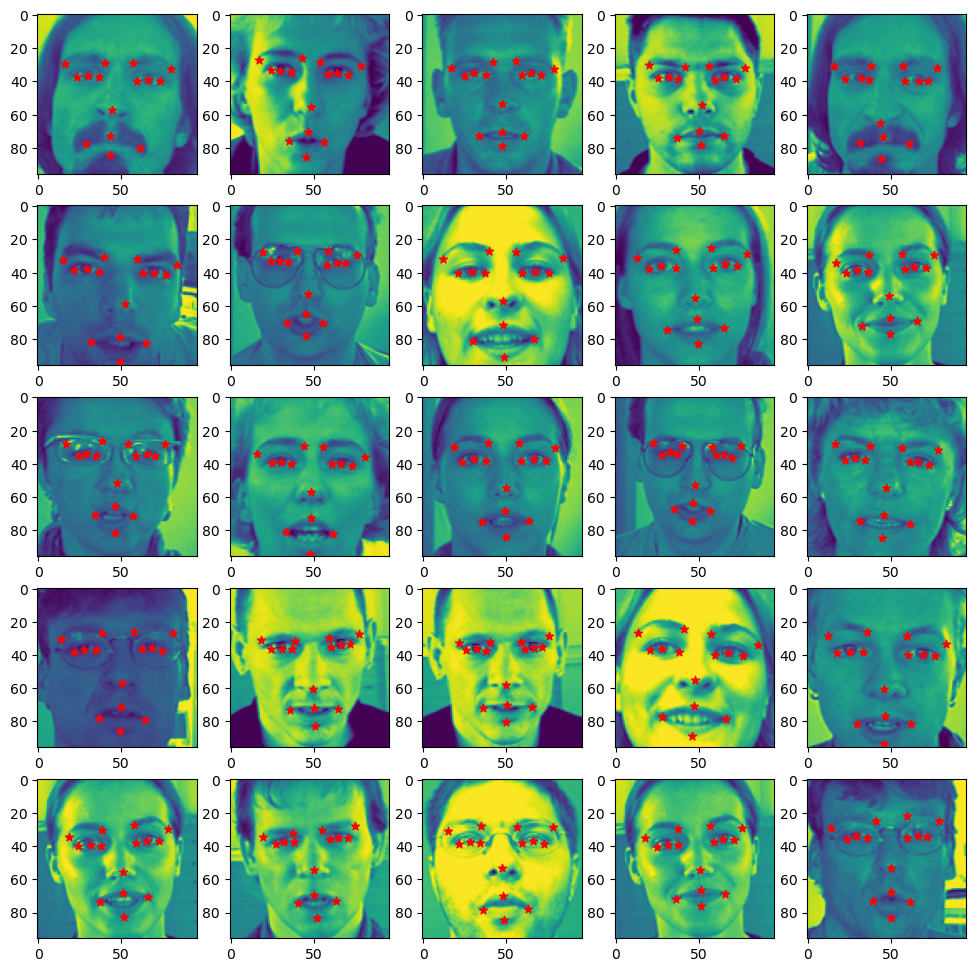

In [25]:
# Gallery with keypoints marking 
fig, ax = plt.subplots(5, 5, figsize = (12,12), dpi = 100)
axes = ax.ravel()

for idx,ax  in enumerate(axes):
    ax.imshow(viz[idx].reshape(96, 96, 1))
    photo_visualize_pnts = keys.iloc[idx].values
    ax.scatter(photo_visualize_pnts[0::2], photo_visualize_pnts[1::2], c='Red', marker='*')
fig.show()

## Augmentation

We can add different augmenations like -

*  flipping
*  rotation
*  cropping
*  adding noise
*  bluring
*  brightness

etc..

In [29]:
# lets create an util to display the augumentation
def display_augmentation(img, feat, img_f, feat_f):
    plt.figure(figsize=(8,8))
    plt.subplot(2,2,1)
    plt.scatter(feat[0::2],-feat[1::2],c='r',marker='x')
    plt.subplot(2,2,2)
    plt.scatter(feat_f[0::2],-feat_f[1::2],c='r',marker='x')
    plt.subplot(2,2,3)
    display_images(img, feat)
    plt.subplot(2,2,4)
    display_images(img_f, feat_f)
    

### Flipping

In [30]:
# an util that give flipped images and targets
def flipping_augmentation(images, features):
    flipped_images = np.flip(images, axis=2)
    
    flipped_features = features.copy()
    for i, feat in enumerate(flipped_features):
        for j, val in enumerate(feat):
            if j%2==0:
                flipped_features[i][j] = 96-val
            
    return flipped_images, flipped_features

In [31]:
# to create an object to keep track of the augmentations
augmentation_functions = {
    'flip' : flipping_augmentation
}

### Cropping 

In [32]:
# lets make an util that give us cropped images and targets
def crop_augmentation(images, targets):
    cropped_images = images.copy()

    for i in range(len(images)):
        cropped_images[i,:,:10] = 0
        cropped_images[i,:,86:] = 0
        cropped_images[i,:10,:] = 0
        cropped_images[i,86:,:] = 0

    return cropped_images, targets


augmentation_functions['crop']=crop_augmentation
    

### Brightness

In [33]:
# to create an util that adds brightness
def brightness_augmentation(images, features, factor=1.5):
    bright = []
    for img in images:
        bright.append(np.clip(img*factor, 0, 255))
    return np.array(bright), features

augmentation_functions['brightness'] = brightness_augmentation

### Adding noise 

In [34]:
# to create an utility that adds noise to the image
def noise_augmentation(images, features, factor):
    augmented = []
    noise = np.random.randint(low=0, high=255, size=images.shape[1:])
    for img in images:
        img = img + (noise*factor)
        augmented.append(img)
    
    return np.array(augmented), features

augmentation_functions['noise'] = noise_augmentation

In [35]:
### Lets prepare our training data
print('Shape of image data', X_train.shape)
print('Shape of target data', targets.shape)

Shape of image data (2131, 96, 96, 1)
Shape of target data (2140, 30)


In [36]:
# ADDING AUGMENTATION

def augmentation(img, feat , method):
    aug_img, aug_feat = method
    img = np.concatenate([img,aug_img])
    feat = np.concatenate([feat,aug_feat])
    return img, feat

In [37]:
# flip
method = flipping_augmentation(X_train, targets)
augmented_images, augmented_targets = augmentation(X_train, targets, method)
print('image augmentation : flipping')

# crop
method = crop_augmentation(X_train, targets)
augmented_images, augmented_targets = augmentation(augmented_images, augmented_targets, method)
print('image augmentation : cropping')

# brightness
method = brightness_augmentation(X_train, targets, factor=2.0)
augmented_images, augmented_targets = augmentation(augmented_images, augmented_targets, method)
print('image augmentation : adding brightness')


# noise
method = noise_augmentation(X_train, targets, factor=0.2)
augmented_images, augmented_targets = augmentation(augmented_images, augmented_targets, method)
print('image augmentation : adding noise')

print('Shape of data after augmentation')
print('Shape of image data',augmented_images.shape)
print('Shape of target data', augmented_targets.shape)

image augmentation : flipping
image augmentation : cropping
image augmentation : adding brightness
image augmentation : adding noise
Shape of data after augmentation
Shape of image data (10655, 96, 96, 1)
Shape of target data (10700, 30)


In [38]:
# to create an util that will display the images
def display_images(img, feat):
    plt.imshow(img, cmap=plt.cm.gray);
    plt.scatter(feat[0::2], feat[1::2], c='r', marker='x')
    

In [39]:
# to check our data one last time before we start building models

def visualize_data(images, targets):
    plt.figure(figsize=(12,12))
    for i in range(10):
        idx = np.random.randint(images.shape[0])
        plt.subplot(2,5,i+1)
        display_images(images[idx], targets[idx])
        plt.axis('off')
    plt.subplots_adjust(bottom=0.5)
    plt.show()

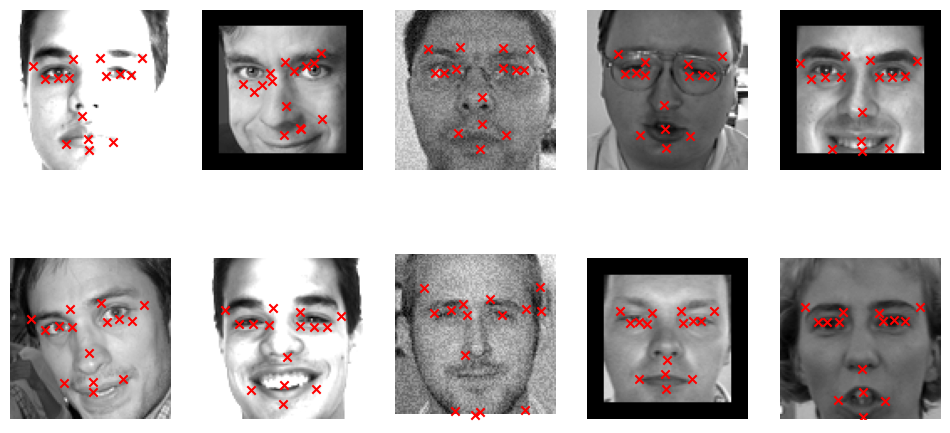

In [40]:
visualize_data(augmented_images, augmented_targets)

In [41]:
# Modeling
pretrained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(96,96,3),include_top=False,weights='imagenet')
%%time
augmented_images = tf.keras.applications.mobilenet_v2.preprocess_input(augmented_images)
%%time

UsageError: Line magic function `%%time` not found.


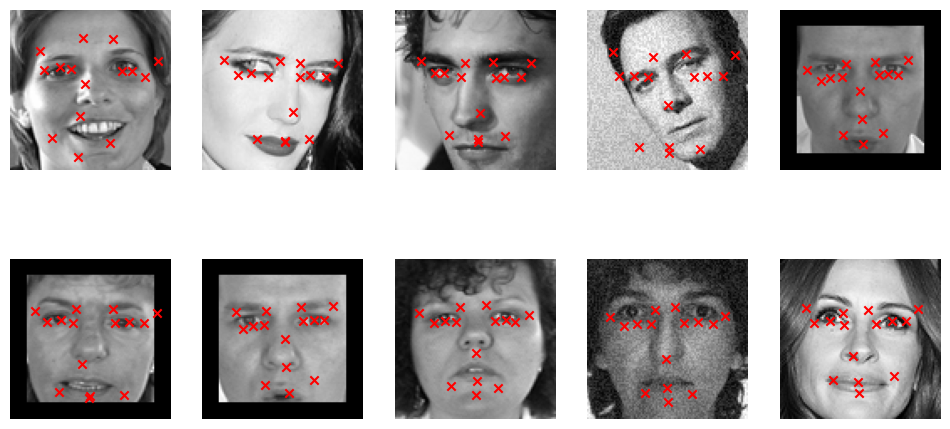

In [42]:
# to check our data to make sure everything is fine
visualize_data(augmented_images,augmented_targets)

In [43]:
# to create TensorFlow datasets from NumPy arrays to efficiently feed data to our model
images_ds = tf.data.Dataset.from_tensor_slices(augmented_images)
targets_ds = tf.data.Dataset.from_tensor_slices(augmented_targets)

ds = tf.data.Dataset.zip((images_ds, targets_ds))
ds = ds.shuffle(buffer_size=augmented_targets.shape[0])
ds = ds.batch(64)
ds = ds.prefetch(tf.data.AUTOTUNE)

In [44]:
# to split a TensorFlow dataset "ds" into two subsets for training and validation
train_ds = ds.skip(10).shuffle(100)
val_ds = ds.take(10)

# FFNN

In [45]:
# to create a preprocessing layer
class ImageTile(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__(trainable = False)
        
    def call(self, inputs):
        return tf.tile(inputs,tf.constant([1,1,1,3]))

def FFNN(units):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(units),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
    ])

block = []
for units in [512,256,128,64]:
    block.append(FFNN(units))
model = tf.keras.Sequential([
    tf.keras.Input(shape=(96,96,1)),
    ImageTile(),
    pretrained_model,
    tf.keras.layers.GlobalMaxPooling2D(),
    *block,
    tf.keras.layers.Dense(30)])
model.layers[1].trainable=False
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy', 'mae', 'mse'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_tile (ImageTile)      (None, 96, 96, 3)         0         
                                                                 
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 sequential (Sequential)     (None, 512)               657920    
                                                                 
 sequential_1 (Sequential)   (None, 256)               132352    
                                                                 
 sequential_2 (Sequential)   (None, 128)              

In [46]:
# decaying learing rate
def decay_lr(epoch):
  return 0.01*math.pow(0.77,epoch)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(decay_lr)
lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(patience=2)
early_stopping = tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        patience=3,
                        restore_best_weights=True)

In [47]:
#  Fit / Train the model
history = model.fit(train_ds, epochs=20, 
                    validation_data=val_ds, 
                    callbacks=[early_stopping,lr_on_plateau])
test.head()

Epoch 1/20
157/157 [==============================] - 56s 306ms/step - loss: 2324.3110 - accuracy: 0.0360 - mae: 44.4065 - mse: 2324.3110 - val_loss: 2082.6060 - val_accuracy: 0.0484 - val_mae: 41.6277 - val_mse: 2082.6060 - lr: 0.0010
Epoch 2/20
157/157 [==============================] - 46s 293ms/step - loss: 1519.2693 - accuracy: 0.0946 - mae: 34.2070 - mse: 1519.2693 - val_loss: 1264.0460 - val_accuracy: 0.0531 - val_mae: 30.5952 - val_mse: 1264.0460 - lr: 0.0010
Epoch 3/20
157/157 [==============================] - 46s 291ms/step - loss: 751.5825 - accuracy: 0.2012 - mae: 21.7956 - mse: 751.5825 - val_loss: 624.3757 - val_accuracy: 0.2438 - val_mae: 19.6861 - val_mse: 624.3757 - lr: 0.0010
Epoch 4/20
157/157 [==============================] - 46s 291ms/step - loss: 317.4810 - accuracy: 0.3509 - mae: 12.8590 - mse: 317.4810 - val_loss: 256.4581 - val_accuracy: 0.4734 - val_mae: 11.5406 - val_mse: 256.4581 - lr: 0.0010
Epoch 5/20
157/157 [==============================] - 45s 288ms/

ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...
1        2  76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2        3  177 176 174 170 169 169 168 166 166 166 161 14...
3        4  176 174 174 175 174 174 176 176 175 171 165 15...
4        5  50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...

In [48]:
# to processes the images from the test dataset to a format suitable for the input of the facial keypoint detection model.
def get_images(test):   
    image = []
    for i in range(0, len(test)):
        img = test['Image'][i].split(' ')
        img = ['0' if x=='' else x for x in img]
        image.append(img)

    image_list = np.array(image, dtype = 'float')
    test_images = image_list.reshape(-1, 96, 96, 1)
    
    return test_images
test_images = get_images(test)
test_images = tf.keras.applications.mobilenet_v2.preprocess_input(test_images)
test_ds = tf.data.Dataset.from_tensor_slices((test_images)).batch(64)

28/28 [==============================] - 10s 278ms/step
Shape of test predictions (1783, 30)


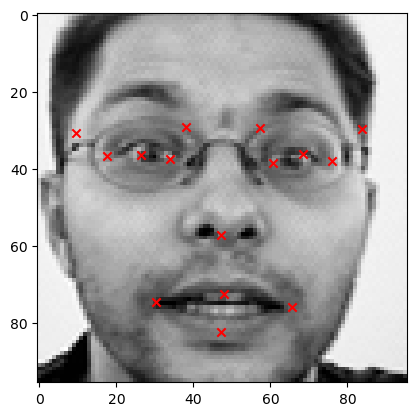

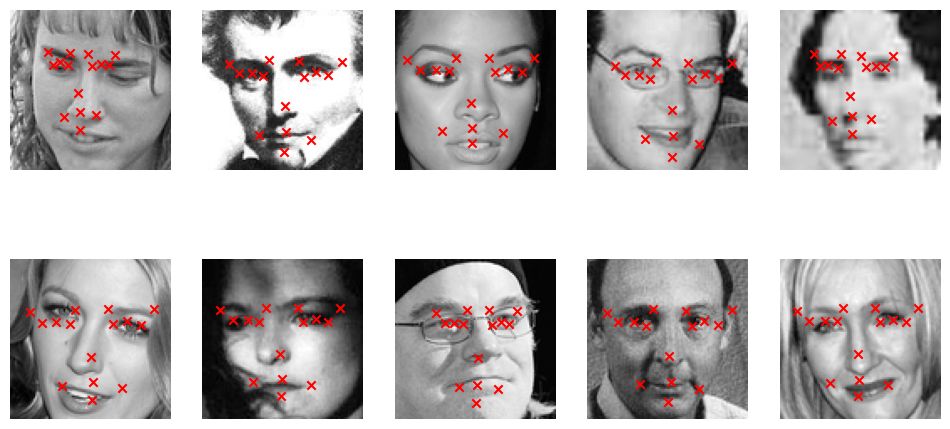

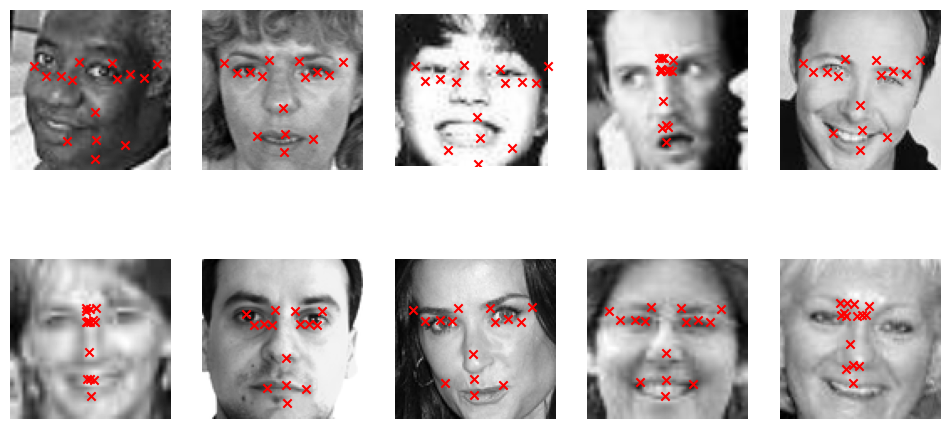

In [49]:
### Predictions 
test_preds = model.predict(test_ds)
print('Shape of test predictions', test_preds.shape)
display_images(test_images[0],test_preds[0])
visualize_data(test_images,test_preds)
visualize_data(test_images,test_preds) 

# CNN
![image.png](attachment:image.png)

CONV: Convolutional kernel layer

RELU: Activation function

POOL: Dimension reduction layer

FC: Fully connection layer

### Convolutional kernel
Feature extraction
![image.png](attachment:image.png)
![image.png](attachment:image.png)

## Activation function
to introduce non-linearity             
to make network learn more complex representations

#### Rectified linear unit，ReLU
![image-2.png](attachment:image-2.png)

### Pooling layer
Dimensionality reduction        
Makes network more computationally efficient         
Prevent Overfitting
![image.png](attachment:image.png)
![image.png](attachment:image.png)

#### Repeat 1-3 to create deep network 

## Fully connected layer

Make predictions about the images using features learned by the Covolutional layers

![image.png](attachment:image.png)

In [50]:
def data_loader():
    
    # Load dataset file
    data_frame = pd.read_csv('training.csv')
    
    data_frame['Image'] = data_frame['Image'].apply(lambda i: np.fromstring(i, sep=' '))
    data_frame = data_frame.dropna()  # Get only the data with 15 keypoints
   
    # Extract Images pixel values
    imgs_array = np.vstack(data_frame['Image'].values)/ 255.0
    imgs_array = imgs_array.astype(np.float32)    # Normalize, target values to (0, 1)
    imgs_array = imgs_array.reshape(-1, 96, 96, 1)
        
    # Extract labels (key point cords)
    labels_array = data_frame[data_frame.columns[:-1]].values
    labels_array = (labels_array - 48) / 48    # Normalize, traget cordinates to (-1, 1)
    labels_array = labels_array.astype(np.float32) 
    
    # shuffle the train data
# imgs_array, labels_array = shuffle(imgs_array, labels_array, random_state=9)  
    
    return imgs_array, labels_array
# # to check/verify data
# imgs, labels = data_loader()
# print(imgs.shape)
# print(labels.shape)

# n=0
# labels[n] = (labels[n]*48)+48
# image = np.squeeze(imgs[n])
# plt.imshow(image, cmap='gray')
# plt.plot(labels[n][::2], labels[n][1::2], 'ro')
# plt.show()
## Building CNN model
# Main model

In [51]:
def the_model():
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:])) # Input shape: (96, 96, 1)
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    # Convert all values to 1D array
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(30))
    
    return model

In [52]:
X_train, y_train = data_loader()
print("Training datapoint shape: X_train.shape:{}".format(X_train.shape))
print("Training labels shape: y_train.shape:{}".format(y_train.shape))
epochs = 60
batch_size = 64

model = the_model()
hist = History()

checkpointer = ModelCheckpoint(filepath='checkpoint1.hdf5', 
                               verbose=1, save_best_only=True)

Training datapoint shape: X_train.shape:(2140, 96, 96, 1)
Training labels shape: y_train.shape:(2140, 30)


In [53]:
# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

### Model fitting

In [54]:
model_fit = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)

model.save('model1.h5')

model_fit = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)

model.save('model1.h5')

Epoch 1/60
27/27 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.4457
Epoch 1: val_loss improved from inf to 0.01208, saving model to checkpoint1.hdf5
27/27 [==============================] - 10s 305ms/step - loss: 0.0427 - accuracy: 0.4457 - val_loss: 0.0121 - val_accuracy: 0.4322
Epoch 2/60
27/27 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.6244
Epoch 2: val_loss improved from 0.01208 to 0.00870, saving model to checkpoint1.hdf5
27/27 [==============================] - 8s 297ms/step - loss: 0.0096 - accuracy: 0.6244 - val_loss: 0.0087 - val_accuracy: 0.4322
Epoch 3/60
27/27 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 0.6846
Epoch 3: val_loss improved from 0.00870 to 0.00757, saving model to checkpoint1.hdf5
27/27 [==============================] - 8s 299ms/step - loss: 0.0067 - accuracy: 0.6846 - val_loss: 0.0076 - val_accuracy: 0.4322
Epoch 4/60
27/27 [==============================] - ETA: 0s - loss: 0.005

27/27 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.8131
Epoch 28: val_loss improved from 0.00414 to 0.00400, saving model to checkpoint1.hdf5
27/27 [==============================] - 8s 308ms/step - loss: 0.0015 - accuracy: 0.8131 - val_loss: 0.0040 - val_accuracy: 0.4883
Epoch 29/60
27/27 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.8324
Epoch 29: val_loss did not improve from 0.00400
27/27 [==============================] - 8s 288ms/step - loss: 0.0015 - accuracy: 0.8324 - val_loss: 0.0040 - val_accuracy: 0.5070
Epoch 30/60
27/27 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.8201
Epoch 30: val_loss improved from 0.00400 to 0.00388, saving model to checkpoint1.hdf5
27/27 [==============================] - 8s 294ms/step - loss: 0.0014 - accuracy: 0.8201 - val_loss: 0.0039 - val_accuracy: 0.5093
Epoch 31/60
27/27 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.8294
Epoch 31: val_loss 

27/27 [==============================] - 8s 293ms/step - loss: 8.4354e-04 - accuracy: 0.8797 - val_loss: 0.0036 - val_accuracy: 0.5257
Epoch 57/60
27/27 [==============================] - ETA: 0s - loss: 8.7045e-04 - accuracy: 0.8645
Epoch 57: val_loss did not improve from 0.00354
27/27 [==============================] - 8s 287ms/step - loss: 8.7045e-04 - accuracy: 0.8645 - val_loss: 0.0038 - val_accuracy: 0.5374
Epoch 58/60
27/27 [==============================] - ETA: 0s - loss: 8.4228e-04 - accuracy: 0.8791
Epoch 58: val_loss did not improve from 0.00354
27/27 [==============================] - 8s 290ms/step - loss: 8.4228e-04 - accuracy: 0.8791 - val_loss: 0.0037 - val_accuracy: 0.5421
Epoch 59/60
27/27 [==============================] - ETA: 0s - loss: 8.0864e-04 - accuracy: 0.8826
Epoch 59: val_loss did not improve from 0.00354
27/27 [==============================] - 8s 288ms/step - loss: 8.0864e-04 - accuracy: 0.8826 - val_loss: 0.0036 - val_accuracy: 0.5421
Epoch 60/60
27/27 [

27/27 [==============================] - ETA: 0s - loss: 6.0346e-04 - accuracy: 0.8972
Epoch 25: val_loss did not improve from 0.00344
27/27 [==============================] - 8s 293ms/step - loss: 6.0346e-04 - accuracy: 0.8972 - val_loss: 0.0035 - val_accuracy: 0.5280
Epoch 26/60
27/27 [==============================] - ETA: 0s - loss: 5.8969e-04 - accuracy: 0.9013
Epoch 26: val_loss did not improve from 0.00344
27/27 [==============================] - 8s 293ms/step - loss: 5.8969e-04 - accuracy: 0.9013 - val_loss: 0.0034 - val_accuracy: 0.5397
Epoch 27/60
27/27 [==============================] - ETA: 0s - loss: 5.8931e-04 - accuracy: 0.8960
Epoch 27: val_loss improved from 0.00344 to 0.00337, saving model to checkpoint1.hdf5
27/27 [==============================] - 8s 303ms/step - loss: 5.8931e-04 - accuracy: 0.8960 - val_loss: 0.0034 - val_accuracy: 0.5444
Epoch 28/60
27/27 [==============================] - ETA: 0s - loss: 5.8174e-04 - accuracy: 0.8843
Epoch 28: val_loss did not im

Epoch 54/60
27/27 [==============================] - ETA: 0s - loss: 4.7108e-04 - accuracy: 0.9211
Epoch 54: val_loss did not improve from 0.00334
27/27 [==============================] - 8s 297ms/step - loss: 4.7108e-04 - accuracy: 0.9211 - val_loss: 0.0033 - val_accuracy: 0.5537
Epoch 55/60
27/27 [==============================] - ETA: 0s - loss: 4.7126e-04 - accuracy: 0.9060
Epoch 55: val_loss did not improve from 0.00334
27/27 [==============================] - 8s 292ms/step - loss: 4.7126e-04 - accuracy: 0.9060 - val_loss: 0.0034 - val_accuracy: 0.5818
Epoch 56/60
27/27 [==============================] - ETA: 0s - loss: 4.7405e-04 - accuracy: 0.9030
Epoch 56: val_loss did not improve from 0.00334
27/27 [==============================] - 8s 295ms/step - loss: 4.7405e-04 - accuracy: 0.9030 - val_loss: 0.0034 - val_accuracy: 0.5818
Epoch 57/60
27/27 [==============================] - ETA: 0s - loss: 4.6625e-04 - accuracy: 0.9089
Epoch 57: val_loss did not improve from 0.00334
27/27 [

In [57]:
#   Test image file with the model
def detect_points(face_img):
    me = np.array(face_img)/255
    x_test = np.expand_dims(me, axis=0)
    x_test = np.expand_dims(x_test, axis=3)

    y_test = model.predict(x_test)
    label_points = (np.squeeze(y_test)*48)+48 
    
    return label_points

1/1 [==============================] - 0s 92ms/step


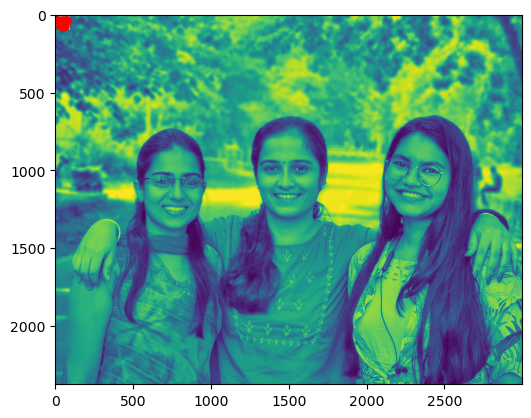

1/1 [==============================] - 0s 21ms/step


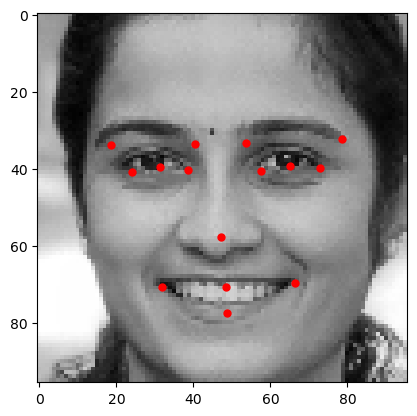

1/1 [==============================] - 0s 21ms/step


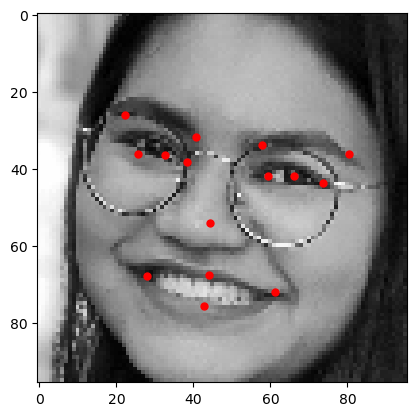

1/1 [==============================] - 0s 20ms/step


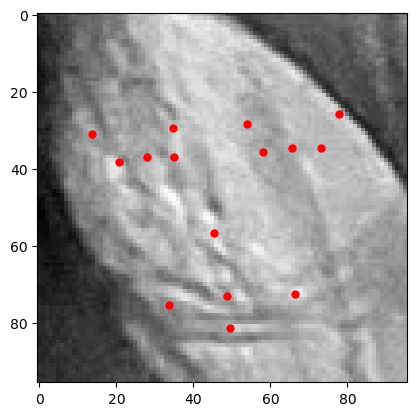

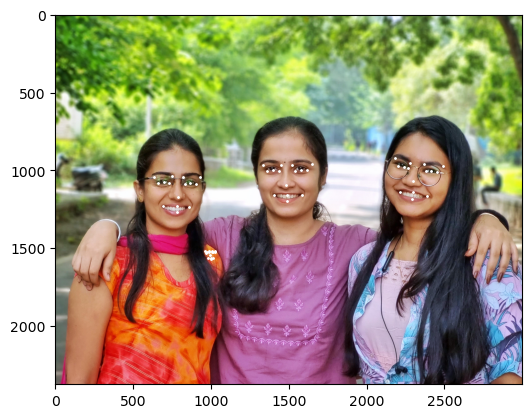

In [58]:
cv2.CascadeClassifier
# Load haarcascade
face_cascade = cv2.CascadeClassifier('C:\\Users\\PRITI CHAUDHARY\\Python\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
dimensions = (96, 96)
# Enter the path to the test image
img = cv2.imread('trio.jpeg')
default_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(default_img)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
faces_img = np.copy(gray_img)
plt.rcParams["axes.grid"] = False

all_x_cords = []
all_y_cords = []

for i, (x,y,w,h) in enumerate(faces):
    
    h += 10
    w += 10
    x -= 5
    y -= 5
    
    just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
    cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)
    
    scale_val_x = w/96
    scale_val_y = h/96
    
    label_point = detect_points(just_face)
    all_x_cords.append((label_point[::2]*scale_val_x)+x)
    all_y_cords.append((label_point[1::2]*scale_val_y)+y)
   
   
    plt.imshow(just_face, cmap='gray')
    plt.plot(label_point[::2], label_point[1::2], 'ro', markersize=5)
    plt.show()
    
    
plt.imshow(default_img)    
plt.plot(all_x_cords, all_y_cords, 'wo',  markersize=1)
plt.show()

In [59]:
 #                               Thank you:)